In [1]:
import scipy as sp
from scipy.sparse import spdiags
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
import numpy as np
import matplotlib.pyplot as plt

# Problem 1

Use the finite element method to solve
 
εy" − y' = −1,

y(0) = α, y(1) = β,


where α = 2, β = 4, and ε = 0.02. Use N = 100 finite elements (101 grid points). Compare
your solution with the analytic solution

y(x) = α + x + (β − α − 1)* (e^(x/ε) − 1)/(e^(1/ε) − 1) by graphing.


In [9]:
def build_A(h, alpha=2,beta=4,epsilon=0.02,N=100):
    #define the function for setting values of A matrix
    def a(i, j):
        if (j==i):
            return -epsilon/h[i-1]-epsilon/h[i]
        elif (j==i+1):
            return epsilon/h[i]+1/2
        elif (j==i-1):
            return epsilon/h[i-1]-1/2
        else:
            return 0
    #initialize A matrix
    a_tri = np.zeros((3,N-1))
    tri_final = csr_matrix((N+1,N+1))
    #create the A matrix
    for j in range(N-1):
        for i in range(3):
            a_tri[i,j] = a(i+j,j+1)
    a_tri = np.hstack([np.zeros((3,1)),a_tri,np.zeros((3,1))])
    a_tri[1,0] = 1
    a_tri[1,-1] = 1
    a_tri[2,:] = np.roll(a_tri[2,:],1)
    a_tri[0,:] = np.roll(a_tri[0,:],-1)
    tri_array = spdiags(a_tri, [-1,0,1], m=N+1, n=N+1)
    tri_array = csr_matrix(tri_array)
    return tri_array
        
def build_phi(h):
    l = -(1/2)*(h[:-1]+h[1:])
    return np.hstack([alpha, l, beta])
    
def finite_element(h, alpha=2,beta=4,epsilon=0.02,N=100):
    """use the finite element method to solve the problem ey"-y'=1
    """
    #get the matrices
    A = build_A(h,alpha,beta,epsilon,N)
    phi = build_phi(h)
    #use the solver for the solution
    K = spsolve(A,phi)
    return K
    
def solution(x, alpha=2, beta=4, epsilon=0.02):
    """The actual solution to  the above define ivp problem
    """
    return alpha + x + ((beta-alpha-1)*
        (np.exp(x/epsilon)-1)/(np.exp(1/epsilon)-1))
    

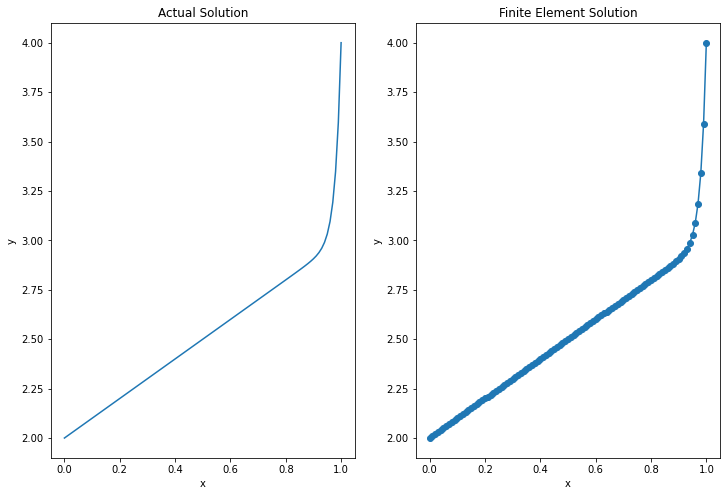

In [10]:
#define the variables
alpha=2
beta=4
epsilon=0.02
N=100
x_s = np.linspace(0,1,N+1)
h = x_s[1:]-x_s[:-1]
#call the function
y_solve = finite_element(h,alpha,beta,epsilon,N)
#get the actual answers
y = solution(x_s, alpha, beta, epsilon)
#plot the results
fig,ax = plt.subplots(1,2,figsize=(12,8))
ax[0].plot(x_s,y)
ax[1].plot(x_s,y_solve,'-o')
ax[0].set_title("Actual Solution")
ax[1].set_title("Finite Element Solution")
ax[0].set_xlabel("x")
ax[0].set_ylabel("y")
ax[1].set_xlabel("x")
ax[1].set_ylabel("y")
plt.show()

# Problem 2

Compare the numerical solution when the grid points are unevenly spaced versus when the grid points
are clustered in the area of greatest change by plotting.

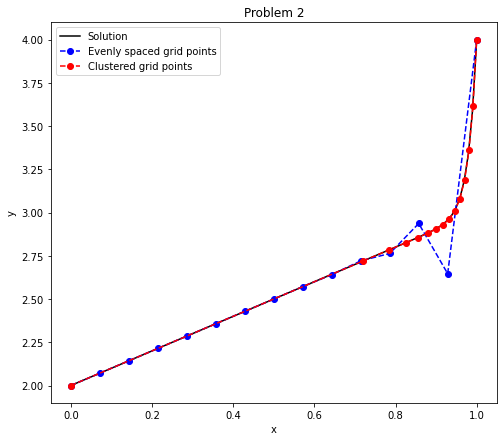

In [11]:
#use function from previous problem to get the results
#define the variables
alpha=2
beta=4
epsilon=0.02
N=14
even_grid = np.linspace(0,1,15)
clustered_grid = np.linspace(0,1,15)**(1./8)
h_clust = clustered_grid[1:] - clustered_grid[:-1] 
h_even = even_grid[1:] - even_grid[:-1]
x_s = np.linspace(0,1,100)
#call the function on even and clustered
y_solve = finite_element(h_even,alpha,beta,epsilon,N)
y_sol = finite_element(h_clust,alpha,beta,epsilon,N)
#get the actual answers
y = solution(x_s, alpha, beta, epsilon)
#plot the results
fig,ax = plt.subplots(1,figsize=(8,7))
ax.plot(x_s,y, color='k', label="Solution")
ax.plot(even_grid,y_solve,'--o',color='b',label="Evenly spaced grid points")
ax.plot(clustered_grid,y_sol,'--o',color='r',label="Clustered grid points")
ax.legend()
ax.set_title("Problem 2")
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.show()

# Problem 3

Solve (11.5) with the finite element method using N = 2^i finite elements, i = 4, 5, . . . , 21.

Use a log-log plot to graph the error.

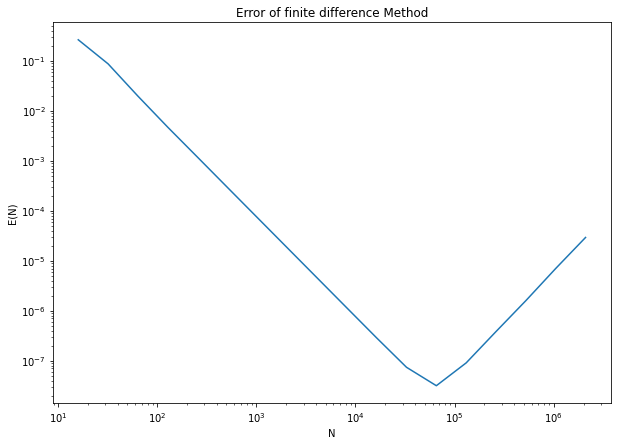

In [12]:
#create the N-list
N_list = [2**i for i in range(4,22)]
alpha=2
beta=4
epsilon=0.02
error_list = list()
#now begin the loop and calculate the error
for n in N_list:
    N = n
    x_s = np.linspace(0,1,N+1)
    h = x_s[1:]-x_s[:-1]
    #call the function
    y_solve = finite_element(h,alpha,beta,epsilon,N)
    #get the actual answers
    y = solution(x_s, alpha, beta, epsilon)
    #calculate the error
    error = np.linalg.norm(y_solve-y,np.inf)
    error_list.append(error)
#now plot the error
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(N_list, error_list)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('N')
ax.set_ylabel("E(N)")
ax.set_title("Error of finite difference Method")
plt.show()